In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
import project

In [5]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

In [6]:
params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH()
params_ML = project.utils.load_ML()
k = 0.104 #strength of the gap junction coupling
k_izh = 0.315
k_ML = 0.0614
Isyn = [ [0, 0.05] , [0, 0.05]] #delta peak of the chemical synapse
Is = np.array(Isyn)
tau = 1 #time constant for the chemical coupling equations

#filtering order
order = 2

#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

#Initial conditions for the LIF
y0 = [-70, -70]

y0 = [-70,-70]
u0 = [0.0,0.0]

y0 = [ -71.7061740390072, -71.7061740390072]
w0 = [0.0007223855976593603, 0.0007223855976593603]

#time constants
dt = 0.01
t_final = 300


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))

for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1

In [7]:
data2aHH, completeHH_2a, a = project.models.HH_Neuron_Pairs(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I1,Is,k,tau)
data2, completeHH_2a_2, a = project.models.HH_Neuron_Pairs(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I2,Is,k,tau)
data2aIF, completeIF_2a, a = project.models.LIF_Neuron_Pairs(dt,t_final,order,y0,*params_LIF,I1,Is,k,tau,1)
data2b, complete_IF_2a, a = project.models.LIF_Neuron_Pairs(dt,t_final,order,y0,*params_LIF,I2,Is,k,tau,1)
data2Ish, completeIsh1, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I1,Is,*params_IZH,k_izh,tau)
data2ish, completeIsh2, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau)


In [9]:

for i in range(4999,15000):
    I1[i,0] =0.5
    I2[i,0] = -0.5
data2aML, completeML, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I1,Is,k_ML,tau)
data2ML, completeML2, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I2,Is,k_ML,tau)

In [10]:
El = -70
variationHHgj = np.zeros((len(data2aHH[:,0]),1))
deltav1 = np.array(abs(El-data2aHH[:,0]))
deltav2 = np.array(abs(El-data2aHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(data2aIF[:,0]), 1))
deltav1 = np.array(abs(El - data2aIF[:,0]))
deltav2 = np.array(abs(El - data2aIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2Ish[:,0]))
deltav2 = np.array(abs(El - data2Ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationIsh2 = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2ish[:,0]))
deltav2 = np.array(abs(El - data2ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2aML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2aML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

variationML2 = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2ML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2ML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


/tmp/ipykernel_7068/3862380659.py:5: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


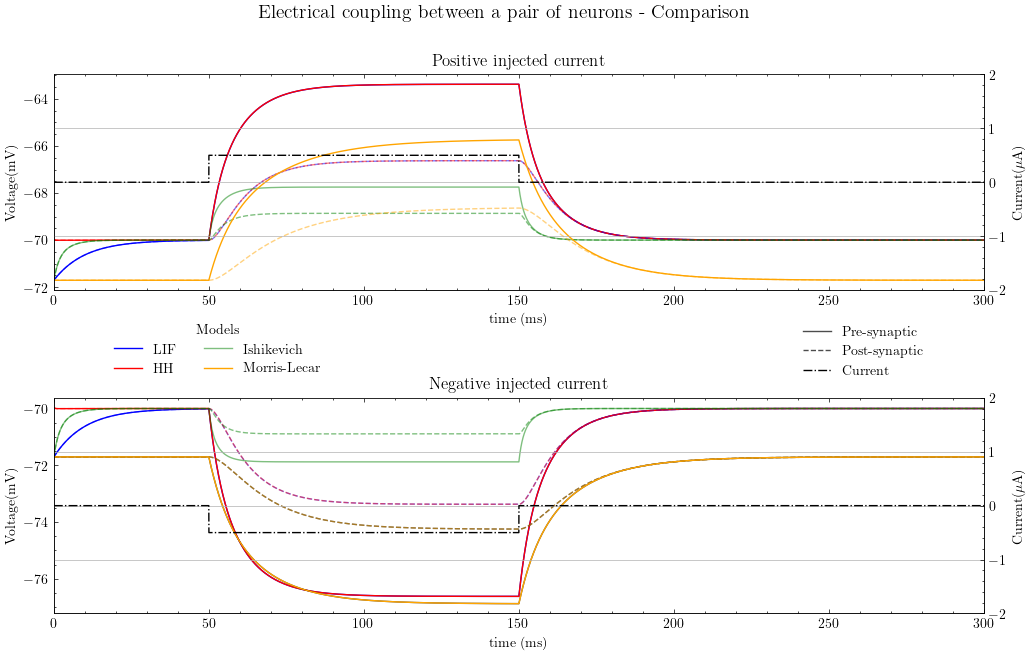

In [11]:
time = np.linspace(0,t_final,int(t_final/dt))

fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')


ax3 = ax1.twinx()
ax4 = ax2.twinx() 
ax1.title.set_text('Positive injected current')
ax2.title.set_text('Negative injected current')

color = 'black'

ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)
ax4.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of neurons - Comparison',fontsize=14)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
lns1 = ax1.plot(time,data2aIF[:,0], label = 'LIF', color = 'b')
lns2 = ax1.plot(time,data2aHH[:,0], label = 'HH', color = 'r' )
lns3 = ax1.plot(time,data2aIF[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data2aHH[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data2Ish[:,0], label = 'Ishikevich', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data2Ish[:,1], 'g--', alpha = 0.5)
lns7 = ax1.plot(time,data2aML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax1.plot(time,data2aML[:,1], '--',color = 'orange', alpha = 0.5)
lnsc = ax3.plot(time,I1[:,0],'-.', color = 'black')

lns1 = ax2.plot(time,data2b[:,0], label = 'LIF', color = 'b')
lns2 = ax2.plot(time,data2[:,0], label = 'HH', color = 'r')
lns3 = ax2.plot(time,data2b[:,1],'b--', alpha = 0.5)
lns4 = ax2.plot(time,data2[:,1], 'r--', alpha = 0.5)
lns5 = ax2.plot(time,data2ish[:,0], label = 'Izhikevich', color = 'g', alpha = 0.5)
lns6 = ax2.plot(time,data2ish[:,1], 'g--', alpha = 0.5)
lnsp = ax2.plot(time,data2ML[:,0], label = 'Pre-synaptic', alpha=0.7,color = 'black')
lnss = ax2.plot(time,data2ML[:,1], '--',color = 'black', alpha = 0.7, label = 'Post-synaptic')
lns7 = ax2.plot(time,data2ML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax2.plot(time,data2ML[:,1], '--',color = 'orange', alpha = 0.5)

lnsc = ax4.plot(time,I2[:,0],'-.', label= 'Current',color = 'black')

#ax1.set_ylim(-71.71,-71.71)
#ax1.set_xlim(2950,3000)

#ax2.set_ylim(-71.707,-71.704)
#ax2.set_xlim(2950,3000)
lns = lnsp + lnss + lnsc
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))

ax1.grid()
ax2.grid()
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

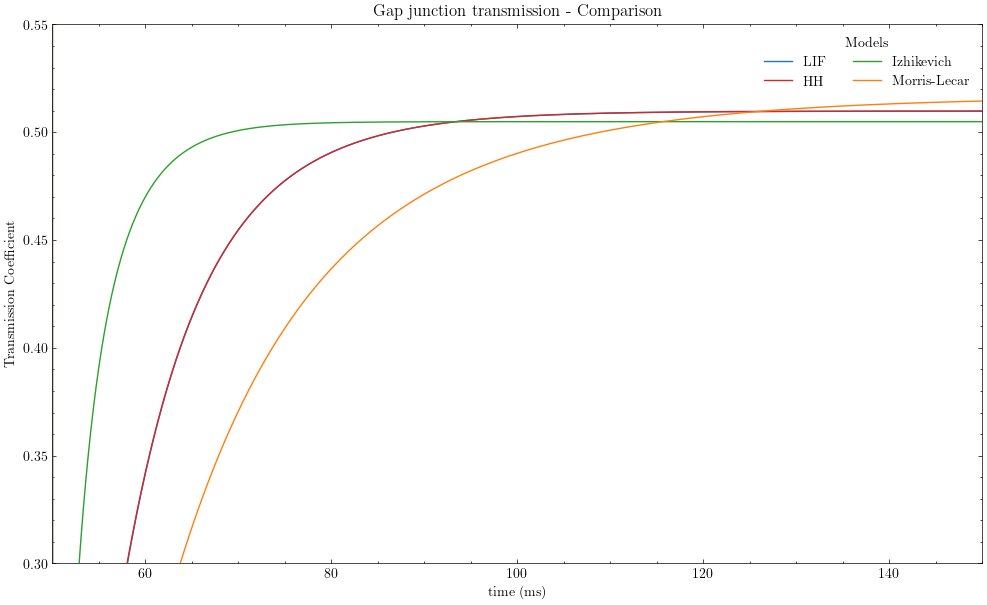

In [12]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(50,150)
plt.ylim(0.3,0.55)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)
plt.grid()

In [13]:
El = -70

variationHHgj2 = np.zeros((len(data2[:,0]),1))
deltav1 = np.array(abs(El-data2[:,0]))
deltav2 = np.array(abs(El-data2[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj2[:,0] = gj_transmission

variationLIFgj2 = np.zeros((len(data2b[:,0]), 1))
deltav1 = np.array(abs(El - data2b[:,0]))
deltav2 = np.array(abs(El - data2b[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj2[:,0] = gj_transmission


variationIsh2 = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2ish[:,0]))
deltav2 = np.array(abs(El - data2ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh2[:,0] = gj_transmission

variationML2 = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2ML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2ML[:,1]))
gj_transmission = deltav2 / deltav1
variationML2[:,0] = gj_transmission


/tmp/ipykernel_7068/2412361587.py:6: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


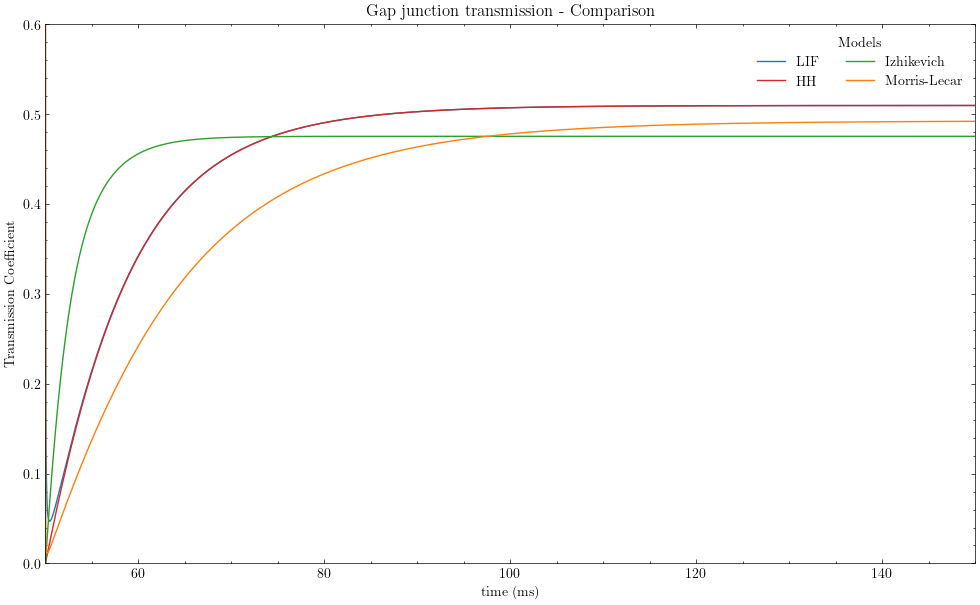

In [14]:
t_final = 300
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(50,150)
plt.ylim(0,0.6)

plt.plot(time,variationLIFgj2, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj2, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh2, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML2, color = 'tab:orange', label = 'Morris-Lecar')
#plt.plot(time,variationIsh2, color = 'red',label = 'Ishikevich2')
#plt.plot(time,variationML2, color = 'black', label = 'Morris-Lecar2')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)
plt.grid()